# Q1

(15%) Please use a neural net (with its architecture shown below) to **find the decision boundary** based on ‘train.mat.” The **activation function** must be used in **the two hidden layers and the output layer**. You can use any off-the-shelf functions to construct and optimize your network model. **Report the test error on the test set** ‘test.mat’ (percentage of misclassified test samples).

In [1]:
import scipy.io
import numpy as np
import matplotlib.pyplot as plt

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.utils import plot_model

In [2]:
import random

random.seed(10)

## read data

In [3]:
train = scipy.io.loadmat('train.mat') 
train_x1=train['x1']
train_x2=train['x2']
train_y=train['y']
print(train_x1.shape,train_x2.shape,train_y.shape)

(70, 1) (70, 1) (70, 1)


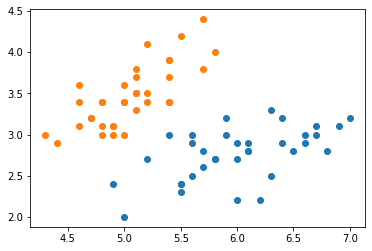

In [4]:
# color= ['red' if train_y == 0 else 'green' for y in train_y]
plt.scatter(train_x1[train_y==0], train_x2[train_y==0])
plt.scatter(train_x1[train_y==1], train_x2[train_y==1])
plt.show()

In [5]:
type(train_x1)

numpy.ndarray

## check GPU

In [6]:
# torch.cuda.is_available()
tf.config.list_physical_devices('GPU')

[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]

## 資料

In [7]:
train_x1 = tf.convert_to_tensor(train_x1)
train_x2 = tf.convert_to_tensor(train_x2)

train_x = tf.concat((train_x1,train_x2),1)
train_y = tf.convert_to_tensor(train_y)
print(train_x.shape)

(70, 2)


In [8]:
# train_x

## model


In [9]:
model=keras.Sequential([layers.Dense(3,activation='sigmoid',input_shape=(2,),use_bias=True),
                        layers.Dense(2,activation='sigmoid',use_bias=True),
                        layers.Dense(1,activation='sigmoid',use_bias=False) # softmax 
                            ])

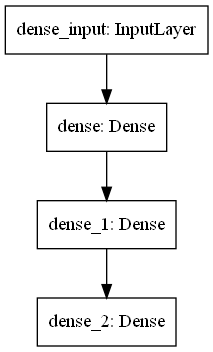

In [10]:
plot_model(model)

In [11]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 3)                 9         
_________________________________________________________________
dense_1 (Dense)              (None, 2)                 8         
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 2         
Total params: 19
Trainable params: 19
Non-trainable params: 0
_________________________________________________________________


In [12]:
model.compile(optimizer=keras.optimizers.Adam(learning_rate=0.01),
             loss=keras.losses.BinaryCrossentropy(),
            metrics=[keras.metrics.BinaryAccuracy()]
             )

### model 儲存目錄

In [13]:
import os 
model_dir='./model'
# os.makedirs(model_dir)

### 設定回調函數-log
- tensorboard會幫忙紀錄資訊，存成tensorboard紀錄檔案


In [14]:
# log_dir=os.path.join('Q1_logs','tf_model')
# model_cbk=keras.callbacks.TensorBoard(log_dir=log_dir)
# model_mckp=keras.callbacks.ModelCheckpoint(model_dir+'/Best_model.h5',save_best_only=True)

In [15]:
# summary(model_mckp)

# train

In [16]:
history=model.fit(train_x,train_y,batch_size=35,epochs=500
                  # ,callbacks=[model_cbk,model_mckp]
                 )

Epoch 1/500
2/2 [==============================] - 0s 3ms/step - loss: 0.7208 - binary_accuracy: 0.5000
Epoch 2/500
2/2 [==============================] - 0s 3ms/step - loss: 0.7174 - binary_accuracy: 0.5000
Epoch 3/500
2/2 [==============================] - 0s 2ms/step - loss: 0.7144 - binary_accuracy: 0.5000
Epoch 4/500
2/2 [==============================] - 0s 2ms/step - loss: 0.7104 - binary_accuracy: 0.5000
Epoch 5/500
2/2 [==============================] - 0s 3ms/step - loss: 0.7066 - binary_accuracy: 0.5000
Epoch 6/500
2/2 [==============================] - 0s 2ms/step - loss: 0.7045 - binary_accuracy: 0.5000
Epoch 7/500
2/2 [==============================] - 0s 2ms/step - loss: 0.7016 - binary_accuracy: 0.5000
Epoch 8/500
2/2 [==============================] - 0s 3ms/step - loss: 0.6988 - binary_accuracy: 0.5000
Epoch 9/500
2/2 [==============================] - 0s 2ms/step - loss: 0.6971 - binary_accuracy: 0.5000
Epoch 10/500
2/2 [==============================] - 0s 2ms/step 

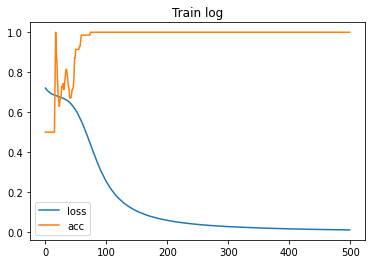

In [17]:
plt.plot(history.history['loss'],label='loss')
plt.plot(history.history['binary_accuracy'],label='acc')
plt.title('Train log')
plt.legend()
plt.savefig('Train_log.jpg')

# test data

In [18]:

test = scipy.io.loadmat('test.mat') 
test_x1=test['x1']
test_x2=test['x2']
test_y=test['y']
# print(test_x.shape,train_x2.shape,train_y.shape)
# model.predict(train_x)
test_x = tf.concat((test_x1,test_x2),1)
test_y = tf.convert_to_tensor(test_y)
print(test_x.shape)

(30, 2)


In [19]:
# B = np.where(A > 0.5, 1, 0)


res = tf.keras.metrics.BinaryAccuracy()
res.update_state(test_y, model.predict(test_x))
print("test error:{}%".format((1-res.result().numpy())*100))

test error:3.333336114883423%


## 畫決策邊界(by_train)

In [20]:
def plot_decision_boundary(X, y, model, steps=1000, cmap='Paired'):
    """
    Function to plot the decision boundary and data points of a model.
    Data points are colored based on their actual label.
    """
    cmap = plt.get_cmap(cmap)
    
    # Define region of interest by data limits
    xmin, xmax = X[:,0].min() - 1, X[:,0].max() + 1
    ymin, ymax = X[:,1].min() - 1, X[:,1].max() + 1
    steps = 1000
    x_span = np.linspace(xmin, xmax, steps)
    y_span = np.linspace(ymin, ymax, steps)
    xx, yy = np.meshgrid(x_span, y_span)
    # Make predictions across region of interest
    labels = model.predict(np.c_[xx.ravel(), yy.ravel()])

    # Plot decision boundary in region of interest
    z = labels.reshape(xx.shape)
    
    fig, ax = plt.subplots()
    ax.contourf(xx, yy, z, cmap=cmap, alpha=0.5)
    
    # print(z)
    
    # Get predicted labels on training data and plot
    train_labels = model.predict(X)
    ax.scatter(X[:,0], X[:,1], c=y, cmap=cmap, lw=0)
    
    return fig, ax

In [21]:
train = scipy.io.loadmat('train.mat') 
train_x1=train['x1']
train_x2=train['x2']
train_y=train['y']
train_x=np.concatenate((train_x1,train_x2),1)
print(train_x.shape,train_y.shape)


test_x1=test['x1']
test_x2=test['x2']
test_y=test['y']
test_x=np.concatenate((test_x1,test_x2),1)

(70, 2) (70, 1)


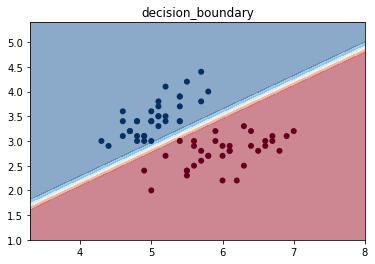

In [22]:

plot_decision_boundary(train_x, train_y, model, cmap='RdBu')
pred= model.predict(test_x)
pred_test_y= np.where( pred> 0.5, 1, 0)
plt.title('decision_boundary')
plt.savefig('Q1_decision_boundary_1.jpg')
# plt.scatter(test_x1[pred_test_y==0], test_x2[pred_test_y==0])
# plt.scatter(test_x1[pred_test_y==1], test_x2[pred_test_y==1])

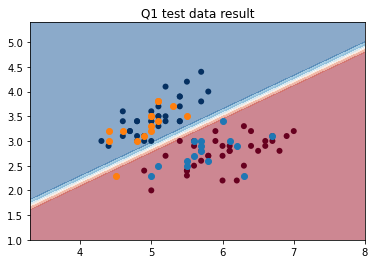

In [23]:


plot_decision_boundary(train_x, train_y, model, cmap='RdBu')
pred= model.predict(test_x)
pred_test_y= np.where( pred> 0.5, 1, 0)
plt.scatter(test_x1[test_y==0], test_x2[test_y==0])
plt.scatter(test_x1[test_y==1], test_x2[test_y==1])
plt.title('Q1 test data result')
plt.savefig('Q1_test_data_result.jpg')

# ref
- 畫決策邊界 
     - https://jonchar.net/notebooks/Artificial-Neural-Network-with-Keras/
     - https://github.com/Sayantanmukherjee6/Neural-Network-Decision-Boundary-Using-Keras/blob/master/decision_boundary.py
- 輕鬆學會google tensorflow2.0 人工智慧深度學習實作開發